Translating the R sequences from https://arxiv.org/abs/1611.09477 into Python vtreat https://github.com/WinVector/pyvtreat

R original

Python translation

In [22]:
## ----msleep, tidy=TRUE---------------------------------------------------

In [ ]:
import pandas
import vtreat # https://github.com/WinVector/pyvtreat


msleep = pandas.read_csv('msleep.csv')
msleep.head()

In [ ]:
## ----isbad---------------------------------------------------------------

In [ ]:
unsupervised_transform = vtreat.UnsupervisedTreatment()
msleep_prepared = unsupervised_transform.fit_transform(msleep)
msleep_prepared.head()

In [ ]:
msleep_prepared.columns

R original

Python translation

In [ ]:
## ----novel, error=TRUE---------------------------------------------------

In [4]:
import pandas
import sklearn.linear_model
import vtreat # https://github.com/WinVector/pyvtreat


df = pandas.DataFrame({'x':['a', 'a', 'b', 'b', 'c', 'c'], 
                       'y':[i+1 for i in range(6)]})
df

,x,y
0,a,1
1,a,2
2,b,3
3,b,4
4,c,5
5,c,6


In [6]:
try:
    model = sklearn.linear_model.LinearRegression(fit_intercept = True).fit(df[['x']], df['y'])
except Exception as ex:
    print(ex)

could not convert string to float: 'a'


In [ ]:
## ----vtreat, results='hide'----------------------------------------------

In [9]:
treatplan = vtreat.NumericOutcomeTreatment(outcome_name='y')
df_treated = treatplan.fit_transform(df, y = df['y'])
df_treated

,y,x_lev_c,x_lev_a
0,1,0,1
1,2,0,1
2,3,0,0
3,4,0,0
4,5,1,0
5,6,1,0


In [14]:
vars = [c for c in df_treated.columns if not c == 'y']
model = sklearn.linear_model.LinearRegression(fit_intercept = True).fit(df_treated[vars], df_treated['y'])

In [ ]:
## ----indicators1---------------------------------------------------------

In [15]:
newdata = pandas.DataFrame({'x':['a', 'b', 'c', 'd']})
newdata

,x
0,a
1,b
2,c
3,d


In [ ]:
## ----indicators2---------------------------------------------------------

In [16]:
newdata_treated = treatplan.transform(newdata)
newdata_treated

,x_lev_c,x_lev_a
0,0,1
1,0,0
2,1,0
3,0,0


In [17]:
model.predict(newdata_treated)

array([1.5, 3.5, 5.5, 3.5])

R original

Python translation

In [43]:
## ----zipcode-------------------------------------------------------------

In [46]:
import numpy.random
import pandas
import seaborn
import vtreat # https://github.com/WinVector/pyvtreat


numpy.random.seed(235)
Nz = 25
zip = ['z' + str(i+1).zfill(5) for i in range(Nz)]
zipval = { zip[i]:(i+1) for i in range(Nz) }
n = 3
m = Nz - n
p = [(0.8/n) for i in range(n)] + [0.2/m for i in range(m)]
N = 1000
zipvar = numpy.random.choice(zip, size=N, p=p)
zipvar
signal = [zipval[zv] for zv in zipvar]
d = pandas.DataFrame({'zip':zipvar, 
                      'y':signal + numpy.random.normal(size=N)})
d.head()

,zip,y
0,z00018,18.522012
1,z00002,1.193435
2,z00001,0.739880
3,z00018,17.157941
4,z00002,2.243728


In [ ]:
## ----vzip, results="hide", warning=FALSE, message=FALSE------------------

In [47]:
treatplan = vtreat.NumericOutcomeTreatment(outcome_name='y')
d_treated = treatplan.fit_transform(d, d["y"])
d_treated.head()

,y,zip_impact_code,zip_prevalence_code,zip_lev_z00002,zip_lev_z00003,zip_lev_z00001
0,18.522012,12.660483,0.013,0,0,0
1,1.193435,-2.851277,0.276,1,0,0
2,0.739880,-3.928832,0.234,0,0,1
3,17.157941,12.776066,0.013,0,0,0
4,2.243728,-2.851277,0.276,1,0,0


In [ ]:
## ----ziptreatplan--------------------------------------------------------

In [48]:
treatplan.score_frame_

,variable,treatment,y_aware,has_range,PearsonR,significance,vcount,recommended
0,zip_impact_code,impact_code,True,True,0.987907,0.000000e+00,1.0,True
1,zip_deviance_code,deviance_code,True,True,-0.049652,1.166190e-01,1.0,False
2,zip_prevalence_code,prevalence_code,False,True,-0.833001,8.590593e-259,1.0,True
3,zip_lev_z00002,indicator_code,False,True,-0.283480,6.165256e-20,3.0,True
4,zip_lev_z00003,indicator_code,False,True,-0.179725,1.046927e-08,3.0,True
5,zip_lev_z00001,indicator_code,False,True,-0.348631,5.932392e-30,3.0,True


In [ ]:
## ----zipfig, echo=FALSE, message=FALSE, warning=FALSE, fig.width=6, fig.height=4----

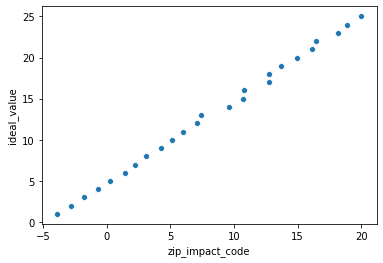

In [57]:
# show, subject to mean shift impact estimates track un-observed (pre-noise) ideal values
d_new = pandas.DataFrame({'zip':zip})
d_new_treated = treatplan.transform(d_new)[['zip_impact_code']]
d_new_treated["zip"] = d_new["zip"]
d_new_treated["ideal_value"] = [zipval[k] for k in d_new_treated["zip"]]
seaborn.scatterplot(x='zip_impact_code', y='ideal_value', data = d_new_treated)

R original

Python translation

R original

Python translation